### Project Objective

The objective of this project is to develop and evaluate various regression models to predict real estate prices. By applying different regression techniques, the aim is to identify the most accurate model for forecasting property values. The project involves:

1. **Data Collection and Preparation:**
   - Gathering relevant real estate data.
   - Cleaning and preprocessing the data to ensure quality and consistency.

2. **Model Development:**
   - Implementing various regression models including Linear Regression, Ridge Regression, Lasso Regression, Polynomial Regression, Decision Trees, Random Forest, and Gradient Boosting.

3. **Model Evaluation:**
   - Evaluating each model based on Mean Squared Error (MSE) and R-squared (R^2) metrics.
   - Comparing model performance to identify the best-performing model.

4. **Optimization and Tuning:**
   - Tuning hyperparameters of each model to improve performance.
   - Conducting cross-validation to ensure robustness and generalization of the models.

5. **Reporting Results:**
   - Presenting the findings with clear metrics and insights.
   - Discussing the effectiveness of each model and suggesting potential improvements or further steps.

The ultimate goal is to determine which regression approach provides the most accurate predictions of real estate prices and to use this information to guide future developments or decisions in real estate analytics.

## "kc_house" Dataset

The "kc_house" dataset contains information about home sale prices in King County, Washington (USA), along with various property features. The data covers the period from May 2014 to May 2015.

##### Below is a general explanation of each of the variables in the dataset to be analyzed:

Columns definition:
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
- condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Data Loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('Desktop/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21613, 21)

### Exploratory Data Analysis (EDA)

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Filling the two missing values in the 'sqft_above' column with the median to maintain robustness against outliers.

In [8]:
median_sqft_above = df['sqft_above'].median()

In [9]:
df['sqft_above'].fillna(median_sqft_above, inplace=True)

In [10]:
df.drop(columns='id', inplace=True)

In [11]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [15]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [16]:
plt.style.use('fivethirtyeight')
sns.set_palette('pastel')
plt.figure(dpi=100)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)

<Figure size 640x480 with 0 Axes>

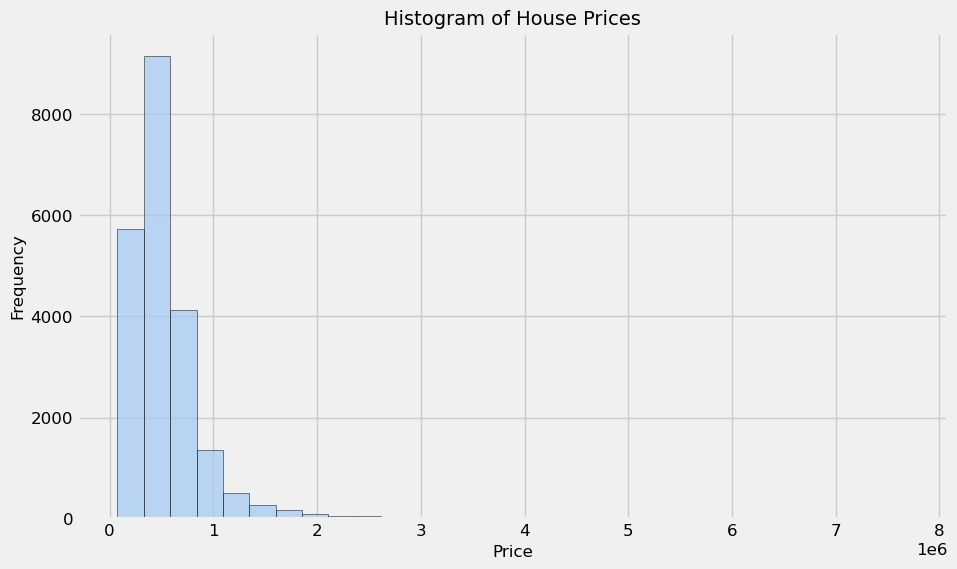

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

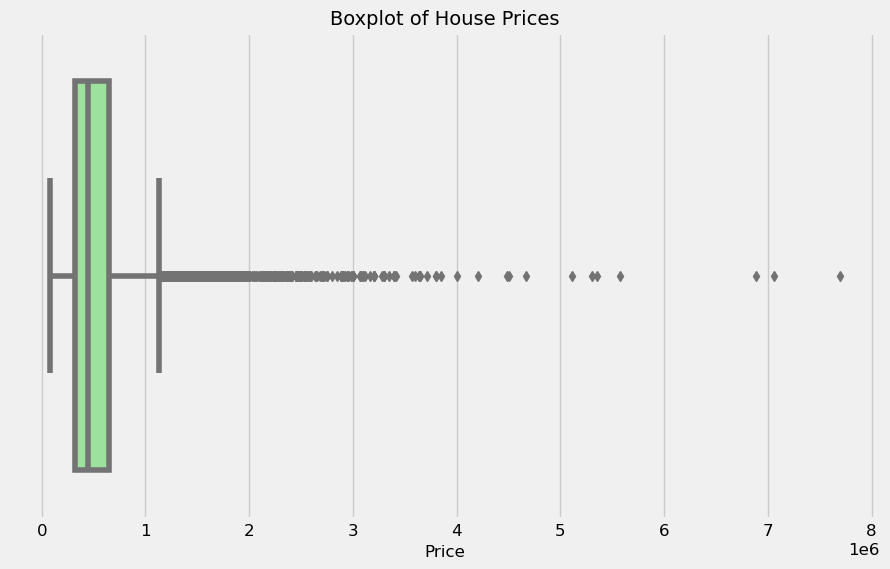

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

In [19]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Removing outlier values from the 'bedrooms' column to enhance data quality and model accuracy.

In [20]:
df = df[df['bedrooms'] <= 10]

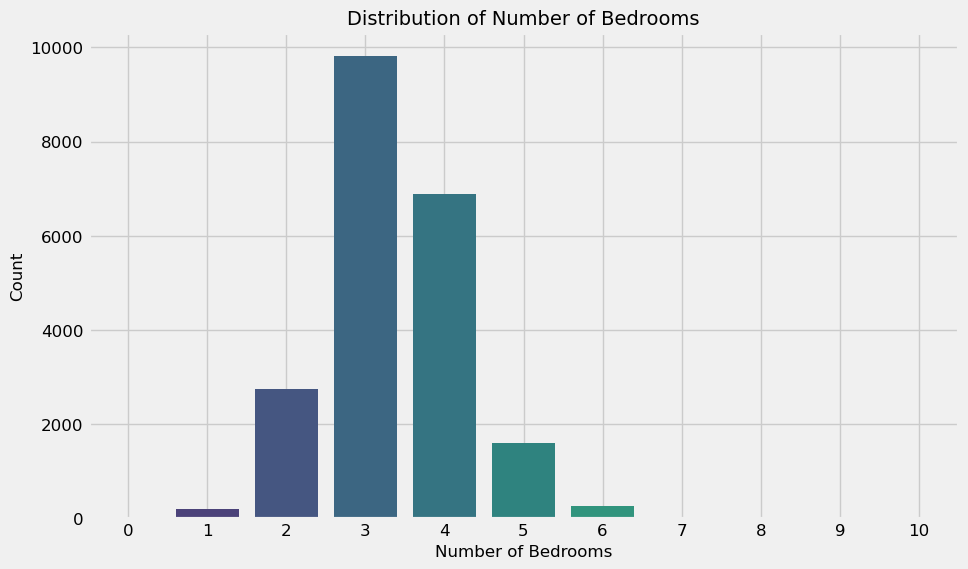

In [21]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x='bedrooms', data=df, palette='viridis')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Removing records with 'bathrooms' values greater than 6 to ensure data quality and improve model performance.

In [22]:
df = df[df['bathrooms'] <= 6]

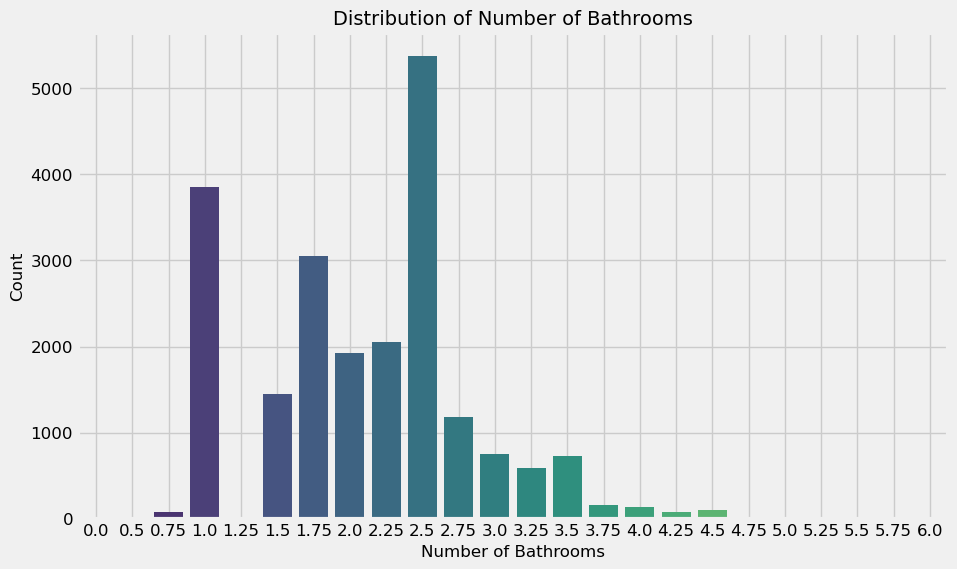

In [23]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x='bathrooms', data=df, palette='viridis')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [24]:
condition = df['yr_renovated'] > df['yr_built']
invalid_renovations = df[~condition]

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


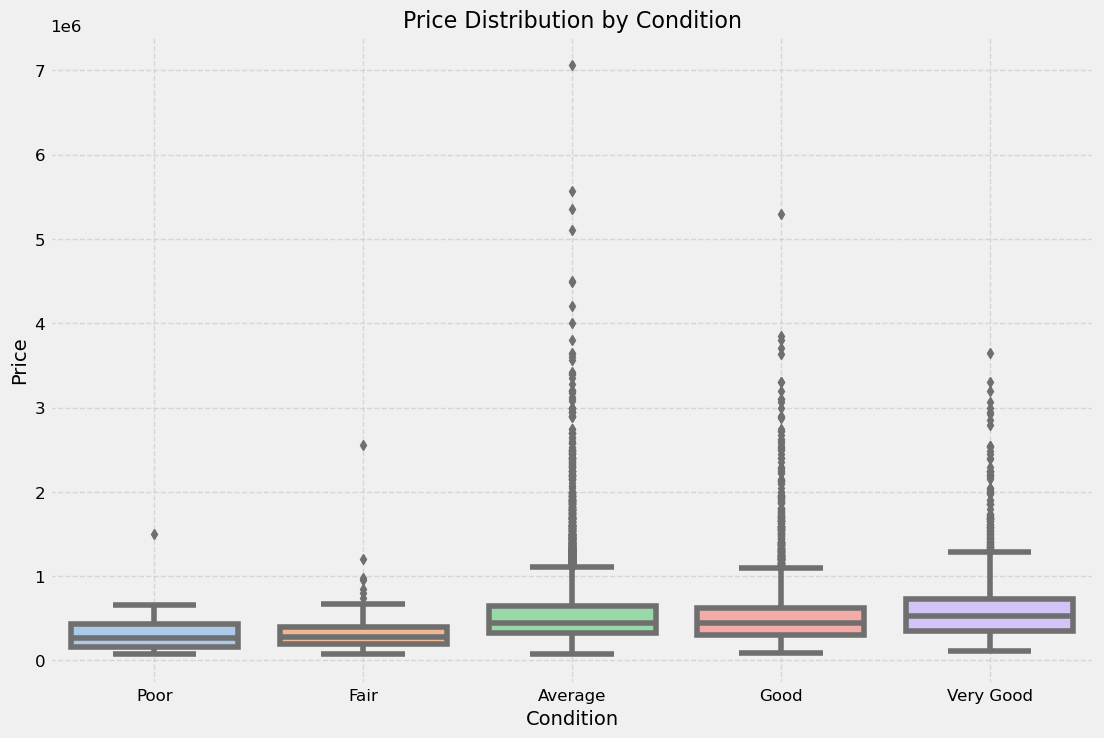

In [26]:
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='condition', y='price', data=df, palette='pastel')
plt.title('Price Distribution by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

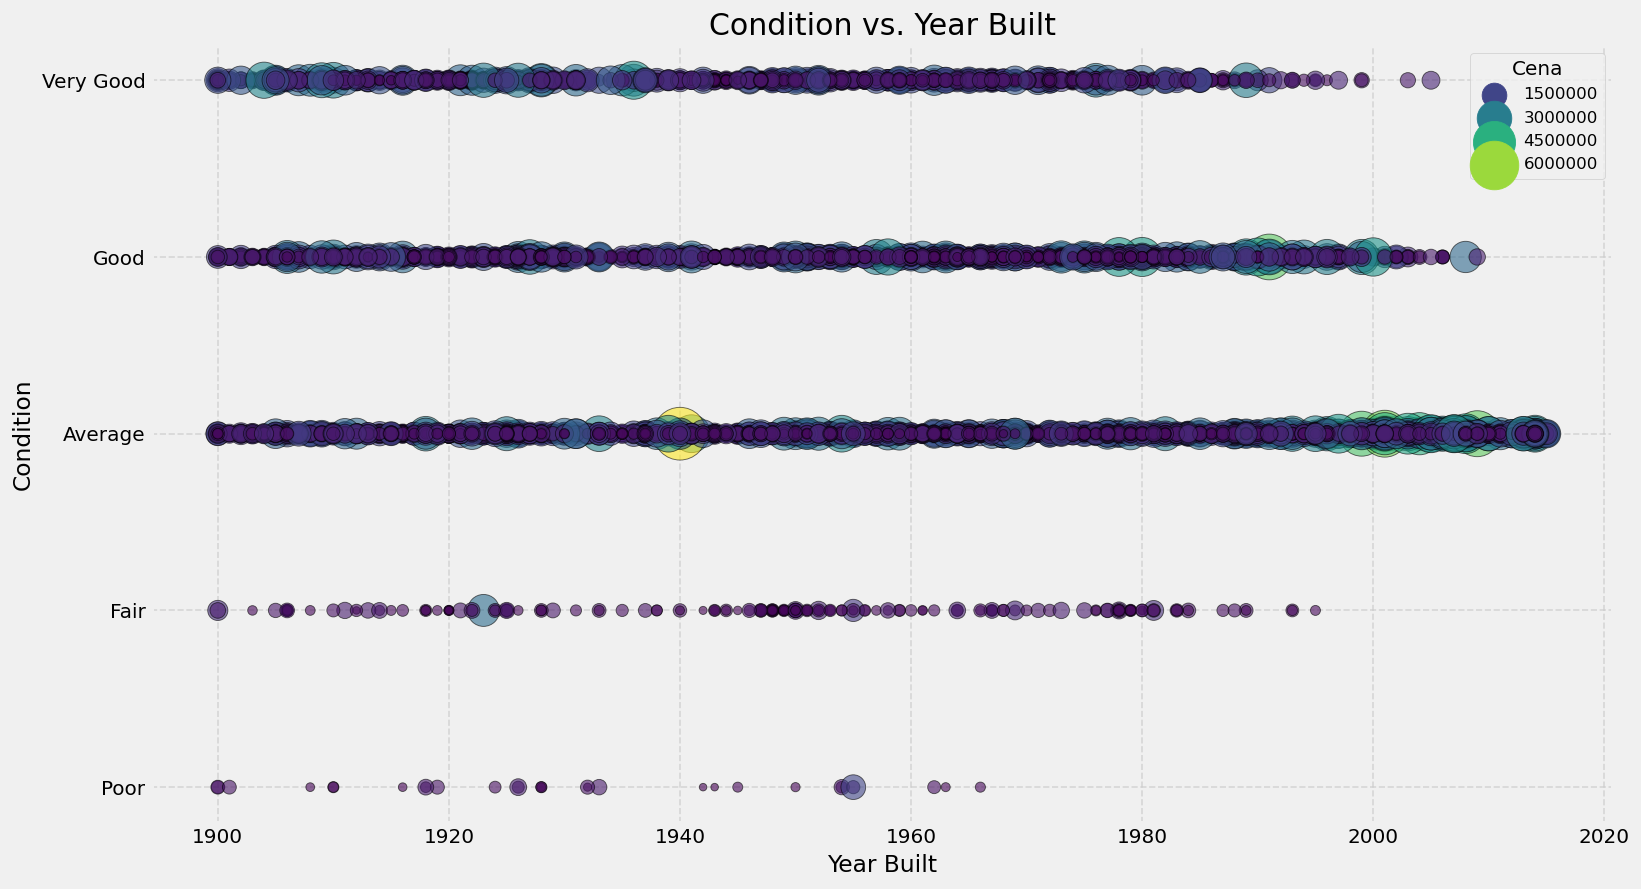

In [27]:
plt.figure(figsize=(14, 8), dpi=120)
sns.scatterplot(x='yr_built', y='condition', size='price', sizes=(20, 1000), hue='price', palette='viridis', alpha=0.6, data=df, edgecolor='black')
plt.title('Condition vs. Year Built', fontsize=18)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Condition', fontsize=14)
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cena', fontsize=10, title_fontsize=12)
plt.show()

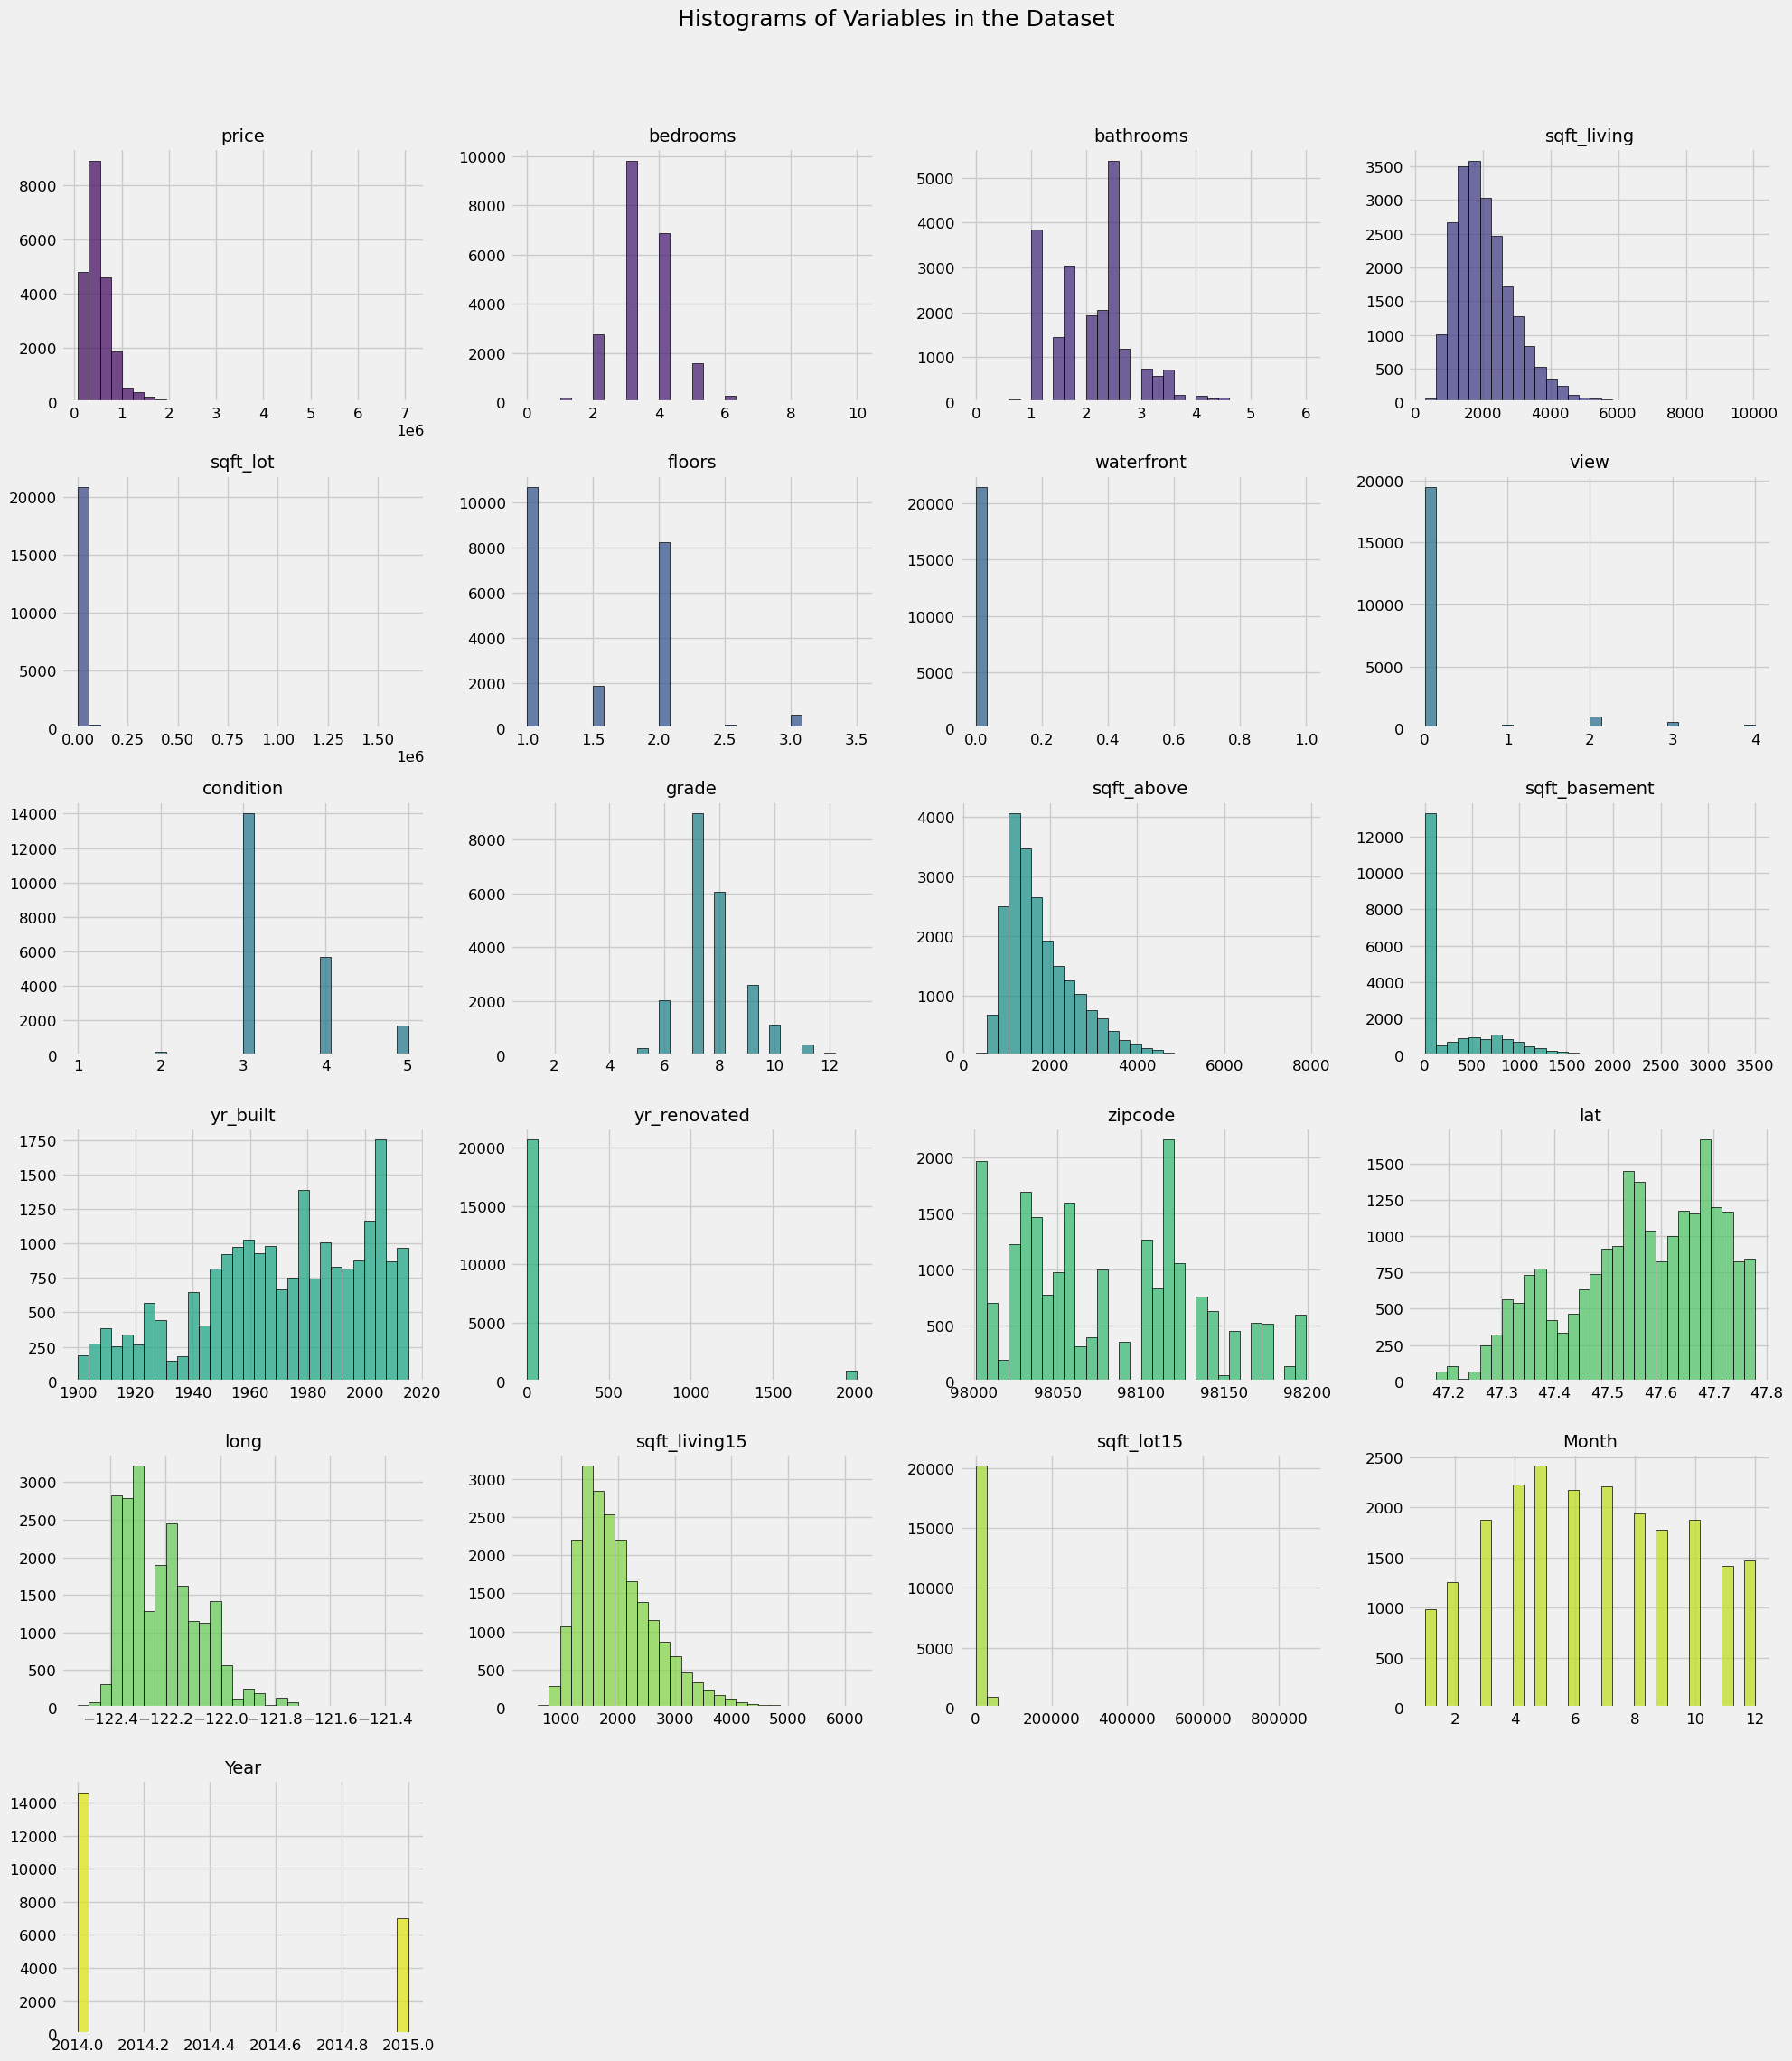

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

n = len(numeric_columns)
n_cols = 4  
n_rows = (n + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

colors = sns.color_palette('viridis', n)

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=False, color=colors[i], ax=axes[i], edgecolor='black')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histograms of Variables in the Dataset', fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [29]:
df_clean = df.select_dtypes(include=['number'])
correlation_matrix = df_clean.corr()

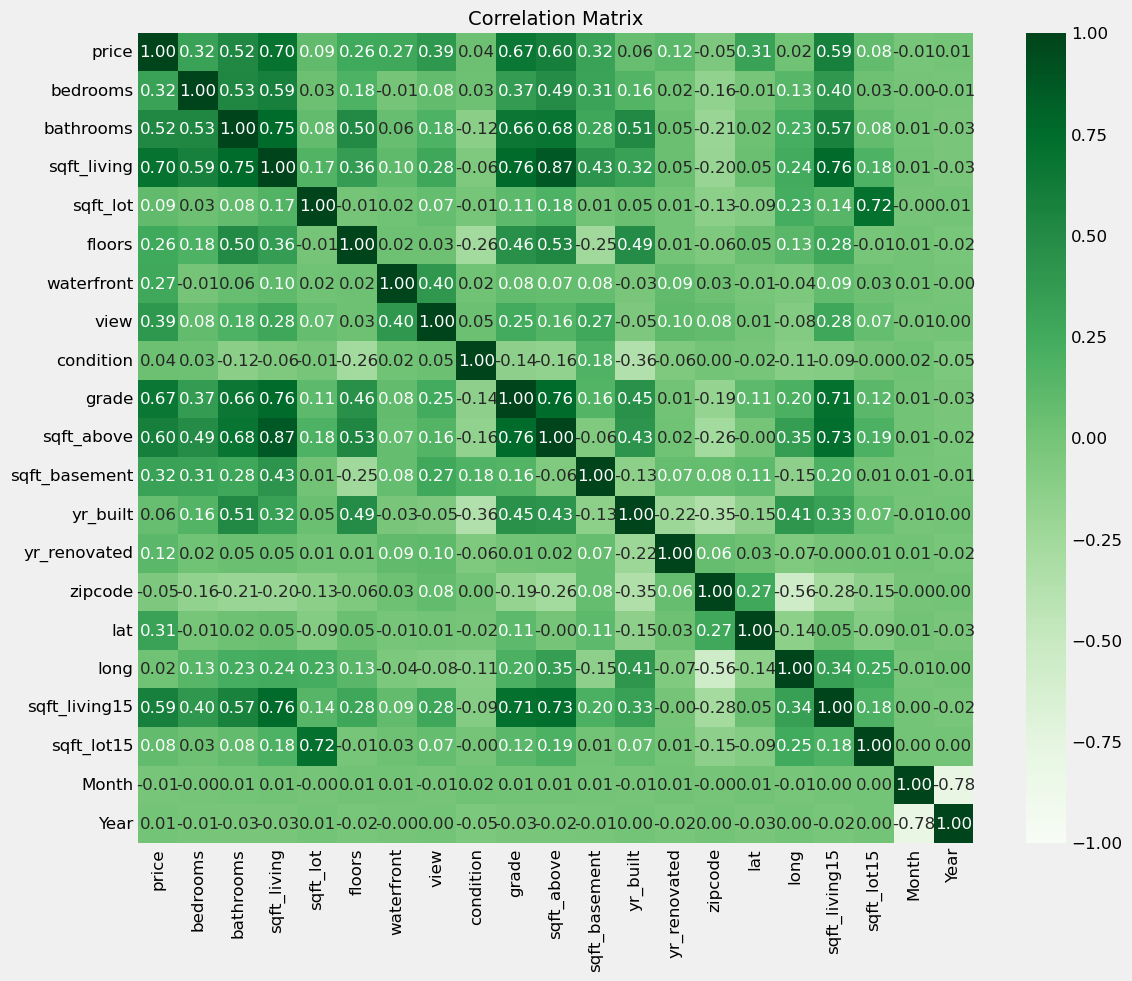

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

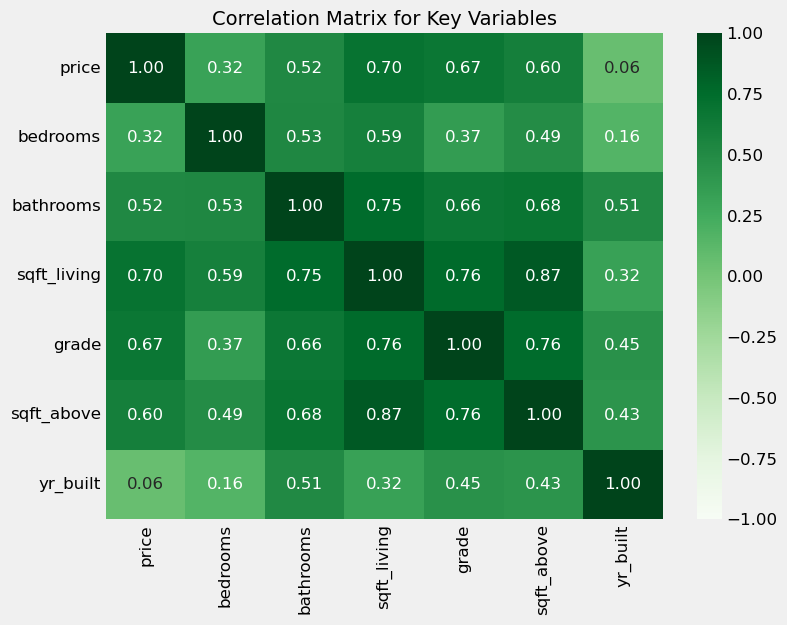

In [31]:
df_subset = df[['price','bedrooms','bathrooms','sqft_living','grade','sqft_above','yr_built']]

correlation_matrix = df_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Key Variables')
plt.show()

### Creating our models

In [32]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]
y = df['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize the data.

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [36]:
lin_reg = LinearRegression()

In [37]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
y_pred = lin_reg.predict(X_test_scaled)

In [39]:
lin_reg.coef_

array([ -35627.78630809,   34422.86759799, -396493.93962288,
           565.12944492,   16037.04062428,   50187.21103607,
         28784.62314034,   12949.24484426,  142216.39172828,
        478294.18733786,  260742.79879313, -103406.45368818,
          4607.25345297,   24370.65895401,  -13796.22122173])

In [40]:
lin_reg.intercept_

536327.7063078703

In [41]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 49469120215.18376
R2: 0.6531299915846068


In [42]:
cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='r2')

In [43]:
print(f"R2 Cross Validation: {np.mean(cv_scores)}")

R2 Cross Validation: 0.6515004680896015


Ridge

In [44]:
ridge = Ridge()

In [45]:
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

In [46]:
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')

In [47]:
ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]}, scoring='r2')

In [48]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)

In [49]:
print(f'Best alpha (Ridge): {ridge_cv.best_params_}')
print(f'MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge)}')
print(f'R^2 (Ridge): {r2_score(y_test, y_pred_ridge)}')

Best alpha (Ridge): {'alpha': 10.0}
MSE (Ridge): 49471072643.262924
R^2 (Ridge): 0.6531163014534441


Lasso

In [50]:
lasso = Lasso(max_iter=10000)

In [51]:
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

In [52]:
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

In [53]:
lasso_cv.fit(X_train_scaled, y_train)

/Users/lukaszsygula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e+14, tolerance: 1.707e+11
  model = cd_fast.enet_coordinate_descent(
/Users/lukaszsygula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+14, tolerance: 1.718e+11
  model = cd_fast.enet_coordinate_descent(
/Users/lukaszsygula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]}, scoring='r2')

In [54]:
y_pred_lasso = lasso_cv.predict(X_test_scaled)

In [82]:
print(f'Best alpha (Lasso): {lasso_cv.best_params_}')
print(f'MSE (Lasso): {mean_squared_error(y_test, y_pred_lasso)}')
print(f'R^2 (Lasso): {r2_score(y_test, y_pred_lasso)}')

Best alpha (Lasso): {'alpha': 100.0}
MSE (Lasso): 49473049024.127
R^2 (Lasso): 0.653102443368967


Polynomial Features

In [56]:
poly = PolynomialFeatures(degree=2)

In [57]:
poly_reg = make_pipeline(poly, Ridge(alpha=10))

In [58]:
poly_reg.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=10))])

In [59]:
y_pred_poly = poly_reg.predict(X_test_scaled)

In [60]:
print(f'MSE (Polynomial): {mean_squared_error(y_test, y_pred_poly)}')
print(f'R^2 (Polynomial): {r2_score(y_test, y_pred_poly)}')

MSE (Polynomial): 42137262941.115814
R^2 (Polynomial): 0.7045398687624067


Decission Tree

In [61]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [62]:
tree_params = {'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}

In [63]:
tree_cv = GridSearchCV(tree_reg, tree_params, cv=5, scoring='r2')

In [64]:
tree_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [65]:
y_pred_tree = tree_cv.predict(X_test_scaled)

In [66]:
print(f'Best parameters for the tree: {tree_cv.best_params_}')
print(f'MSE (Tree): {mean_squared_error(y_test, y_pred_tree)}')
print(f'R^2 (Tree): {r2_score(y_test, y_pred_tree)}')

Best parameters for the tree: {'max_depth': 5, 'min_samples_split': 2}
MSE (Tree): 50216818547.568054
R^2 (Tree): 0.6478872436699854


Random Forest

In [67]:
forest_reg = RandomForestRegressor(random_state=42)

In [68]:
forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
forest_cv = GridSearchCV(forest_reg, forest_params, cv=5, scoring='r2', n_jobs=-1)

In [70]:
forest_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [71]:
y_pred_forest = forest_cv.predict(X_test_scaled)

In [72]:
print(f'Best parameters for Random Forest: {forest_cv.best_params_}')
print(f'MSE (Forest): {mean_squared_error(y_test, y_pred_forest)}')
print(f'R^2 (Forest): {r2_score(y_test, y_pred_forest)}')

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE (Forest): 34495468819.75197
R^2 (Forest): 0.7581229763587407


Gradient Boosting

In [73]:
gb_reg = GradientBoostingRegressor(random_state=42)

In [74]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [75]:
gb_cv = GridSearchCV(gb_reg, gb_params, cv=5, scoring='r2', n_jobs=-1)

In [76]:
gb_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [77]:
y_pred_gb = gb_cv.predict(X_test_scaled)

In [78]:
print(f'Best parameters for Gradient Boosting: {gb_cv.best_params_}')
print(f'MSE (Gradient Boosting): {mean_squared_error(y_test, y_pred_gb)}')
print(f'R^2 (Gradient Boosting): {r2_score(y_test, y_pred_gb)}')

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
MSE (Gradient Boosting): 34972869716.13064
R^2 (Gradient Boosting): 0.7547755132903848


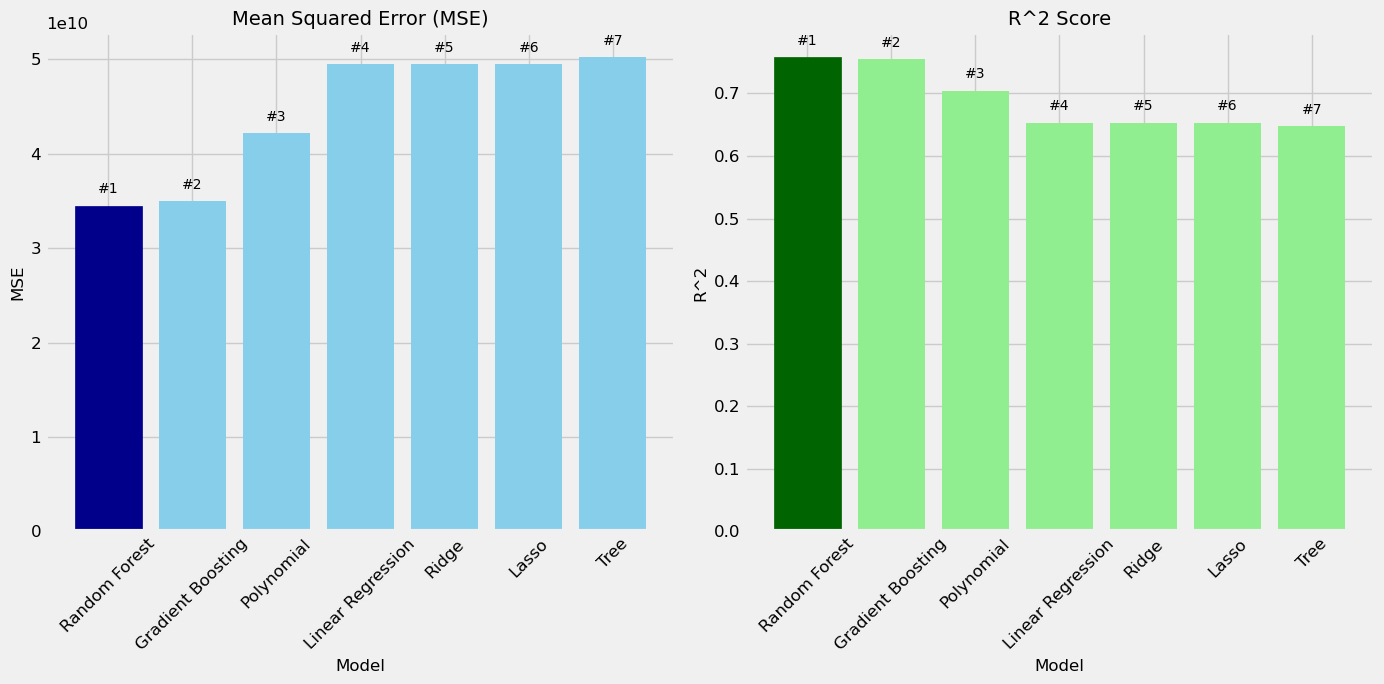

In [79]:
models = ['Linear Regression', 'Ridge', 'Lasso', 'Polynomial', 'Tree', 'Random Forest', 'Gradient Boosting']
mse_values = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_tree),
    mean_squared_error(y_test, y_pred_forest),
    mean_squared_error(y_test, y_pred_gb)
]
r2_values = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_poly),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_forest),
    r2_score(y_test, y_pred_gb)
]

best_mse_idx = np.argmin(mse_values)
best_r2_idx = np.argmax(r2_values)


mse_rank = np.argsort(mse_values)
ranked_models_mse = np.array(models)[mse_rank]
ranked_mse_values = np.array(mse_values)[mse_rank]


r2_rank = np.argsort(r2_values)[::-1] 
ranked_models_r2 = np.array(models)[r2_rank]
ranked_r2_values = np.array(r2_values)[r2_rank]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars = plt.bar(ranked_models_mse, ranked_mse_values, color='skyblue')

bars[mse_rank.tolist().index(best_mse_idx)].set_color('darkblue')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(mse_values), 
             f'#{i + 1}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bars = plt.bar(ranked_models_r2, ranked_r2_values, color='lightgreen')

bars[r2_rank.tolist().index(best_r2_idx)].set_color('darkgreen')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(r2_values), 
             f'#{i + 1}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Regression Modeling on Real Estate Pricing Data

1. **Linear Regression:** 
   - **MSE:** 49,469,120,215.18
   - **R^2:** 0.653
   - The baseline linear regression model, setting a standard for comparisons.

2. **Ridge Regression:**
   - **Best Alpha:** 10.0
   - **MSE:** 49,471,072,643.26
   - **R^2:** 0.653
   - Minimal improvement with regularization.

3. **Lasso Regression:**
   - **Best Alpha:** 100.0
   - **MSE:** 49,473,049,024.13
   - **R^2:** 0.653
   - Similar results to Ridge, with no significant benefits from regularization.

4. **Polynomial Regression:**
   - **MSE:** 42,137,262,941.12
   - **R^2:** 0.705
   - Significant improvement over linear regression by capturing nonlinearity.

5. **Decision Tree Regressor:**
   - **Best Parameters:** `{'max_depth': 5, 'min_samples_split': 2}`
   - **MSE:** 50,216,818,547.57
   - **R^2:** 0.648
   - The Decision Tree performs less well compared to other models.

6. **Random Forest Regressor:**
   - **Best Parameters:** `{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}`
   - **MSE:** 34,495,468,819.75
   - **R^2:** 0.758
   - Shows the best performance in terms of MSE and R^2, performing well with a large number of trees and depth.

7. **Gradient Boosting Regressor:**
   - **Best Parameters:** `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}`
   - **MSE:** 34,972,869,716.13
   - **R^2:** 0.755
   - Close to Random Forest in performance but slightly worse, may need further tuning.

### Conclusions:

- **Random Forest** and **Gradient Boosting** show the best results and might be the best choices for further model development.
- **Polynomial Regression** offers a significant improvement compared to linear models.
- Regularized models (Ridge and Lasso) and **Decision Trees** did not show significant improvement over the baseline linear regression model.
